In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf

## Data analysis

In [2]:
# Data Importing
data = pd.read_csv('./data/02 Household Power Consumption.txt',delimiter = ';')
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
185706,24/4/2007,16:30:00,0.320,0.082,235.190,1.600,0.000,2.000,0.0
185707,24/4/2007,16:31:00,0.328,0.078,234.530,1.600,0.000,1.000,0.0
185708,24/4/2007,16:32:00,0.344,0.088,234.900,1.800,0.000,1.000,0.0
185709,24/4/2007,16:33:00,0.416,0.174,235.290,2.000,0.000,1.000,0.0


In [3]:
data.describe()

,Sub_metering_3
count,185702.000000
mean,6.553521
std,8.469009
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [4]:
data['Date'].describe()

count        185711
unique          131
top       18/2/2007
freq           1440
Name: Date, dtype: object

In [5]:
data['Date'].value_counts()

18/2/2007     1440
22/4/2007     1440
19/3/2007     1440
18/3/2007     1440
17/3/2007     1440
              ... 
21/4/2007     1440
20/1/2007     1439
24/4/2007      995
16/12/2006     396
8                1
Name: Date, Length: 131, dtype: int64

In [6]:
data.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           9
dtype: int64

In [7]:
# replace custom nan values with standard numpy nan
data.replace('?', np.nan, inplace=True)
data.replace(' ', np.nan, inplace=True)
data.replace('  ', np.nan, inplace=True)
data.replace('   ', np.nan, inplace=True)

In [8]:
data.iloc[49850:49860,:].head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49850,20/1/2007,08:14:00,1.122,0.106,237.880,4.800,0.000,0.000,0.0
49851,20/1/2007,08:15:00,1.122,0.108,238.400,4.600,0.000,0.000,0.0
49852,20/1/2007,08:16:00,1.118,0.108,238.230,4.600,0.000,0.000,0.0
49853,20/1/2007,08:17:00,1.606,0.102,237.830,7.600,0.000,0.000,0.0
49854,20/1/2007,08:18:00,3.124,0.084,236.420,13.200,0.000,0.000,0.0
49855,8,08:19:00,2.984,0.086,236.340,12.600,0.000,0.000,0.0
49856,20/1/2007,08:20:00,1.622,0.102,238.160,7.800,0.000,0.000,0.0
49857,20/1/2007,08:21:00,0.840,0.114,239.480,3.600,0.000,0.000,0.0
49858,20/1/2007,08:22:00,0.828,0.112,239.070,3.400,0.000,0.000,0.0
49859,20/1/2007,08:23:00,0.834,0.118,240.460,3.400,0.000,0.000,0.0


In [9]:
data.replace({'8': '20/1/2007'}, inplace=True)

In [10]:
data.iloc[49850:49860,:].head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49850,20/1/2007,08:14:00,1.122,0.106,237.880,4.800,0.000,0.000,0.0
49851,20/1/2007,08:15:00,1.122,0.108,238.400,4.600,0.000,0.000,0.0
49852,20/1/2007,08:16:00,1.118,0.108,238.230,4.600,0.000,0.000,0.0
49853,20/1/2007,08:17:00,1.606,0.102,237.830,7.600,0.000,0.000,0.0
49854,20/1/2007,08:18:00,3.124,0.084,236.420,13.200,0.000,0.000,0.0
49855,20/1/2007,08:19:00,2.984,0.086,236.340,12.600,0.000,0.000,0.0
49856,20/1/2007,08:20:00,1.622,0.102,238.160,7.800,0.000,0.000,0.0
49857,20/1/2007,08:21:00,0.840,0.114,239.480,3.600,0.000,0.000,0.0
49858,20/1/2007,08:22:00,0.828,0.112,239.070,3.400,0.000,0.000,0.0
49859,20/1/2007,08:23:00,0.834,0.118,240.460,3.400,0.000,0.000,0.0


<AxesSubplot:>

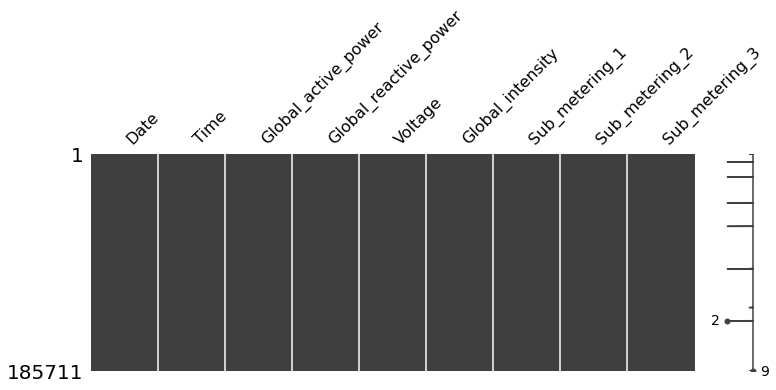

In [11]:
msno.matrix(data, figsize=(12, 4))

<AxesSubplot:title={'center':'Sub_metering_3'}>

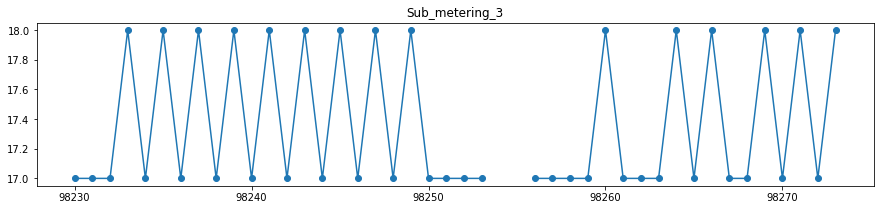

In [12]:
data["Sub_metering_3"][98230:98274].plot(title="Sub_metering_3", marker="o", figsize=(15,3))

<AxesSubplot:title={'center':'Sub_metering_3'}>

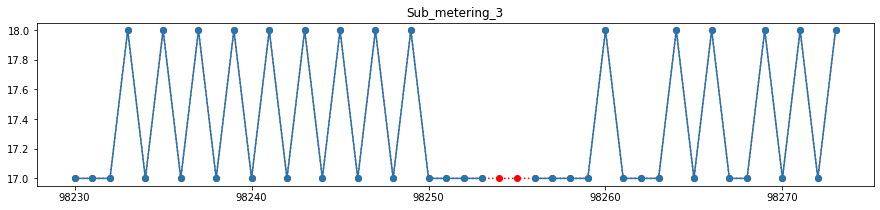

In [13]:
# Ffill imputation
ffill_imp = data.fillna(method="ffill")
ffill_imp["Sub_metering_3"][98230:98274].plot(color="red", marker="o", linestyle="dotted", figsize=(15,3))
data["Sub_metering_3"][98230:98274].plot(title="Sub_metering_3", marker="o")

In [14]:
# creating bool series True for NaN values
bool_series = pd.isnull(data["Sub_metering_3"])
   
# filtering data
# displaying data only with Gender = NaN
data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61909,28/1/2007,17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98254,22/2/2007,22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98255,22/2/2007,22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142588,25/3/2007,17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Fill in the empty values with the previous values
data.fillna(method='backfill', axis=None, inplace=True)

In [16]:
# using isnull() function 
data.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185711 non-null  object 
 3   Global_reactive_power  185711 non-null  object 
 4   Voltage                185711 non-null  object 
 5   Global_intensity       185711 non-null  object 
 6   Sub_metering_1         185711 non-null  object 
 7   Sub_metering_2         185711 non-null  object 
 8   Sub_metering_3         185711 non-null  float64
dtypes: float64(1), object(8)
memory usage: 12.8+ MB


In [18]:
# data.to_excel('household_power_consumption.xlsx')

In [19]:
#astype() method is used to cast a pandas object to a specified dtype. 
#astype() function also provides the capability to convert any suitable existing column to categorical type.

for values in data.columns[2:-1]:
    data[values] = data[values].astype('float64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185711 non-null  float64
 3   Global_reactive_power  185711 non-null  float64
 4   Voltage                185711 non-null  float64
 5   Global_intensity       185711 non-null  float64
 6   Sub_metering_1         185711 non-null  float64
 7   Sub_metering_2         185711 non-null  float64
 8   Sub_metering_3         185711 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.8+ MB


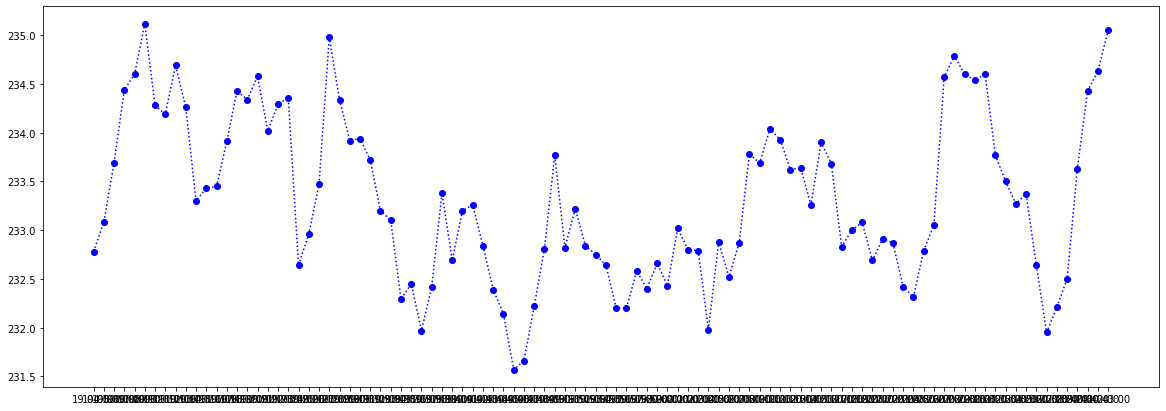

In [21]:
plt.figure(figsize=(20,7))
plt.plot(data['Time'][100:200],[float(x) for x in data['Voltage']][100:200],color='blue',marker= 'o' ,linestyle='dotted')

In [22]:
# merge Date and Time into a datetime object
util_series = data['Date'] + " " + data['Time']
data['DateTime'] = util_series.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
185706,24/4/2007,16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,24/4/2007,16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,24/4/2007,16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,24/4/2007,16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [23]:
#drop old Date and Time columns
data.drop(columns = ['Date','Time'],inplace = True)
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [24]:
#rearranging columns
cols = list(data.columns)
cols = cols[-1:] + cols[:-1]
data = data[cols]
data

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
185706,2007-04-24 16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0
185707,2007-04-24 16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0
185708,2007-04-24 16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0
185709,2007-04-24 16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0


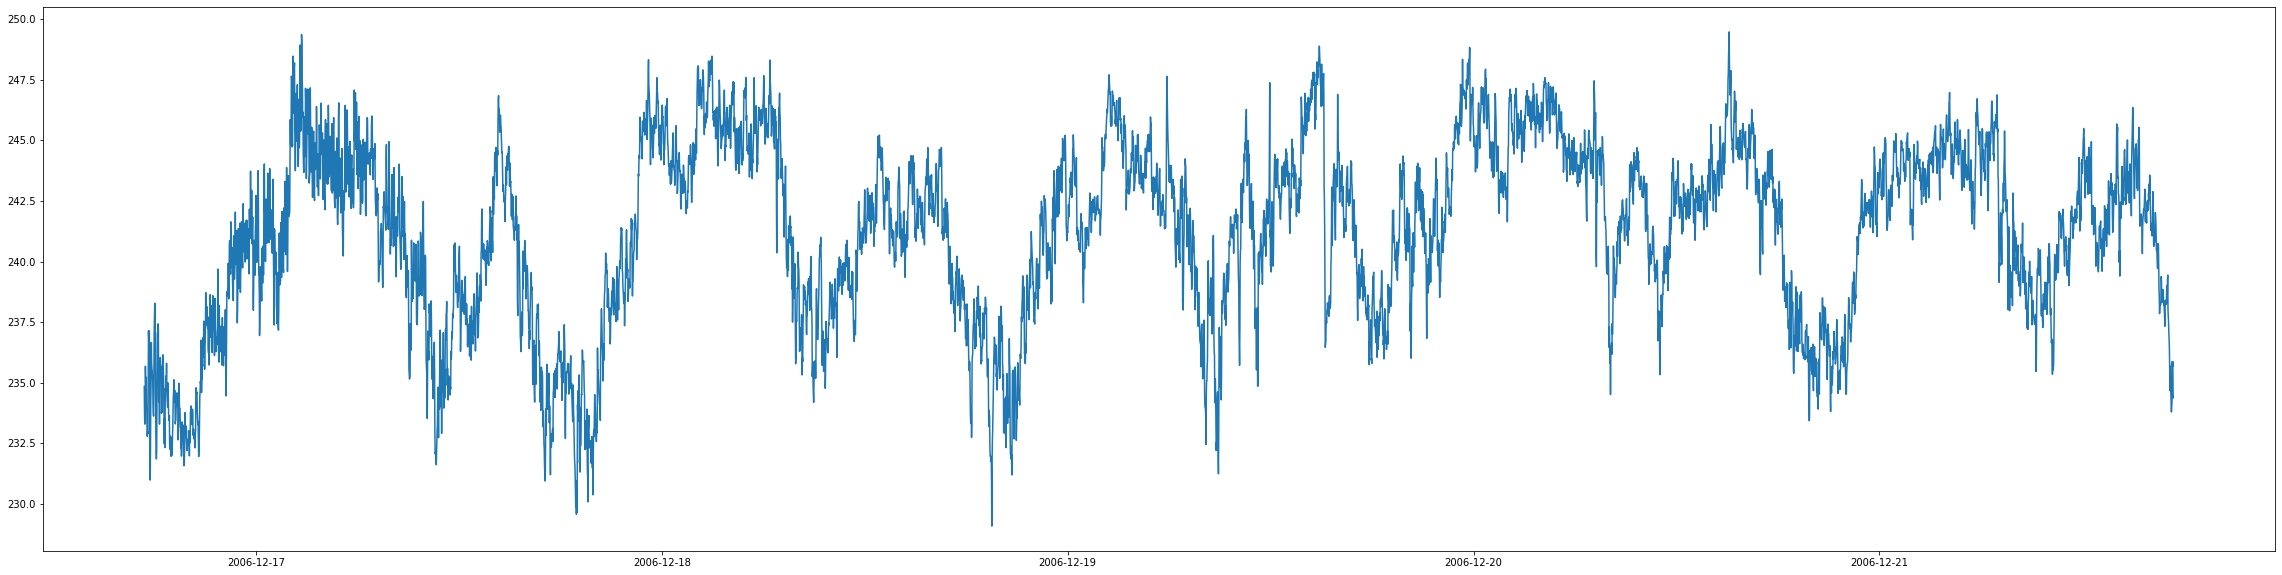

In [25]:
plt.figure(figsize=(40,10))

# plot for 5 days = 7200 minutes
plt.plot(data['DateTime'][:7200],[float(x) for x in data['Voltage']][:7200])

In [26]:
data.isnull().any(axis = 1).sum()

0

In [27]:
m, n = data.shape
df_per = (data.isnull().sum().sum())/m
col_pers = {}
for i in data.columns:
    col_pers[i] = (data[i].isnull().sum())/m

print(df_per)
print(col_pers)

0.0
{'DateTime': 0.0, 'Global_active_power': 0.0, 'Global_reactive_power': 0.0, 'Voltage': 0.0, 'Global_intensity': 0.0, 'Sub_metering_1': 0.0, 'Sub_metering_2': 0.0, 'Sub_metering_3': 0.0}


## Pre-Processing

In [28]:
# Target Variable
eq1 = (data['Global_active_power']*1000/60) 
eq2 = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']
data['power_consumption'] = eq1 - eq2
data.head()

C:\Users\saifa\AppData\Local\Temp\ipykernel_10568\961842166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['power_consumption'] = eq1 - eq2


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


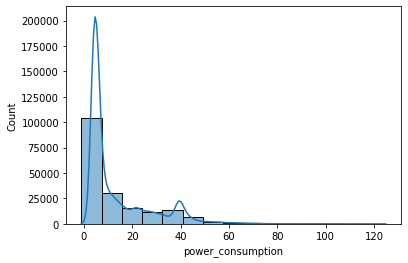

In [29]:
# Distribution of the target variables
sns.histplot(data=data, x='power_consumption', bins=15, kde=True)
plt.show()

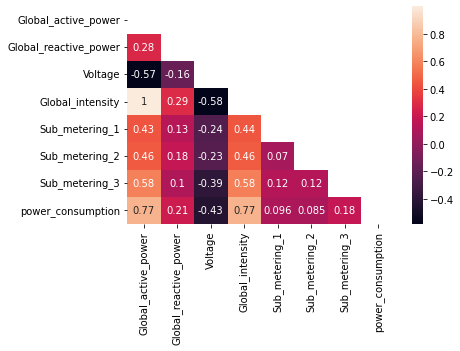

In [30]:
corr = np.corrcoef(data.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, mask=mask)
plt.show()